<h1>Creating the training and test data for the NN</h1>
<h2>This will involve spinning up the simulation, identifying the points in the densest 10% of the sim, calculating the tidal vectors at these points and returning a tuple of the point, the tidal vector, and the density field?

In [1]:
#Create test graph from nbodykit

from src.nn_graph import *
from nbodykit.lab import *
from nbodykit import style, setup_logging
from pmesh.pm import ParticleMesh
from src.tidal_vectors import *

redshift = 0.55
cosmo = cosmology.Planck15
Plin = cosmology.LinearPower(cosmo, redshift, transfer='EisensteinHu')

BoxSize=1380
nbar=3e-3
bias=1.0
seed=42
nmesh = 256


In [ ]:
#Will want to vary the bias and nbar
cat = LogNormalCatalog(Plin=Plin, nbar=3e-3, BoxSize=BoxSize, Nmesh=nmesh, bias=1.0, seed=42)

#extract particle positions from catalogue
mesh = cat.to_mesh(resampler='tsc')

<class 'pmesh.pm.RealField'>
mean of 1+delta =  1.0000004
min of 1+delta =  0.0
max of 1+delta =  18.71194


Text(0.5, 1.0, 'Slice of Density Field')

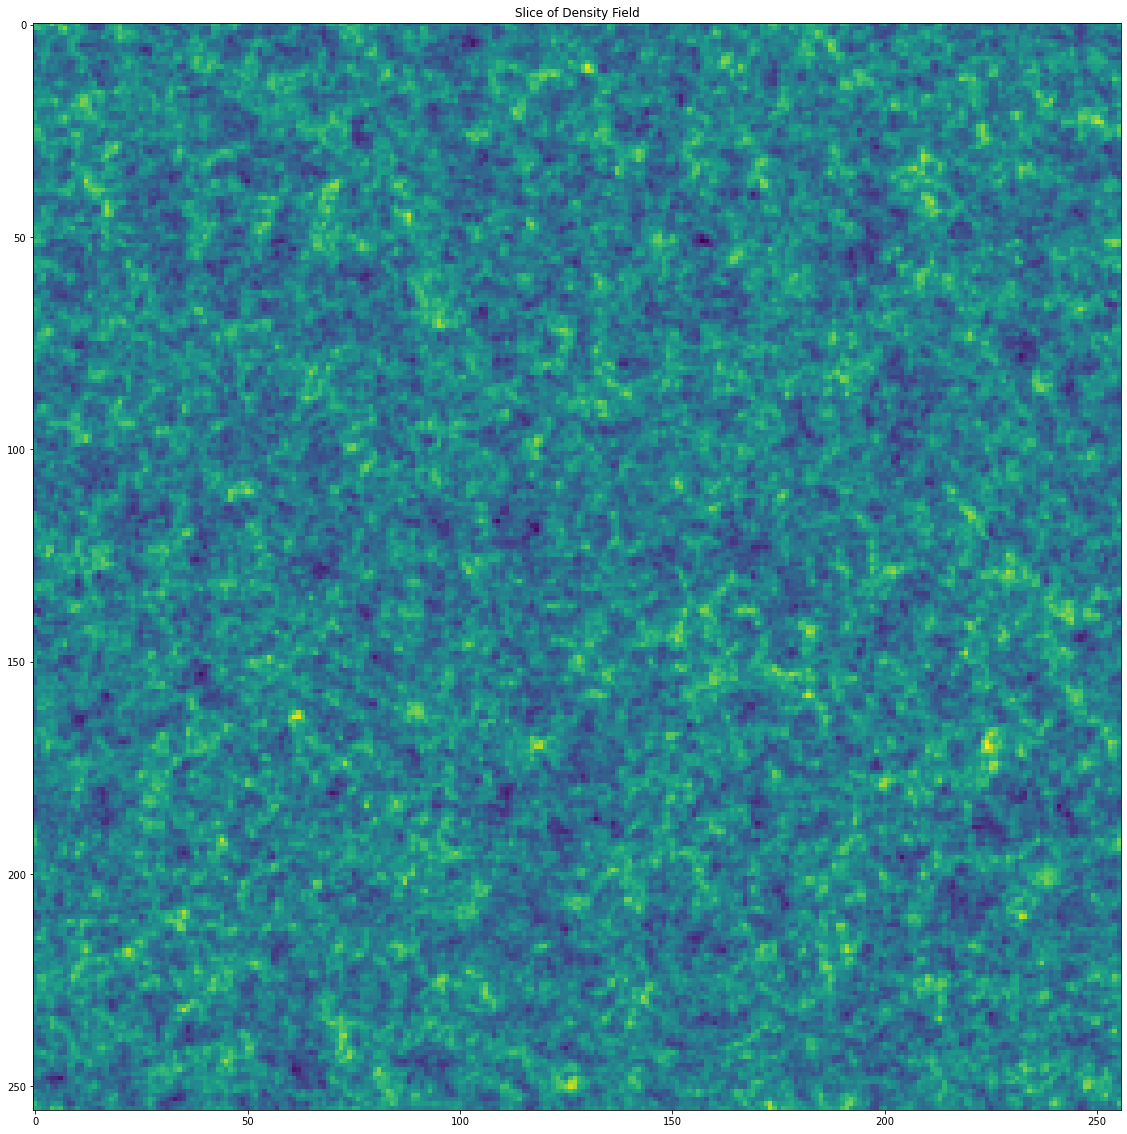

In [2]:
one_plus_delta = mesh.paint(mode='real')
print(type(one_plus_delta))

print("mean of 1+delta = ", one_plus_delta.value.mean())
print("min of 1+delta = ", one_plus_delta.value.min())
print("max of 1+delta = ", one_plus_delta.value.max())

plt.figure(figsize = (20,20))
plt.imshow(one_plus_delta.preview(axes=[0,1]))
plt.title("Slice of Density Field")

In [3]:
tidal_results = calculate_tidal_vecs(mesh)

NameError: name 'mesh' is not defined

Text(0.5, 1.0, 'Slice of Rho After Lowpass Filtering')

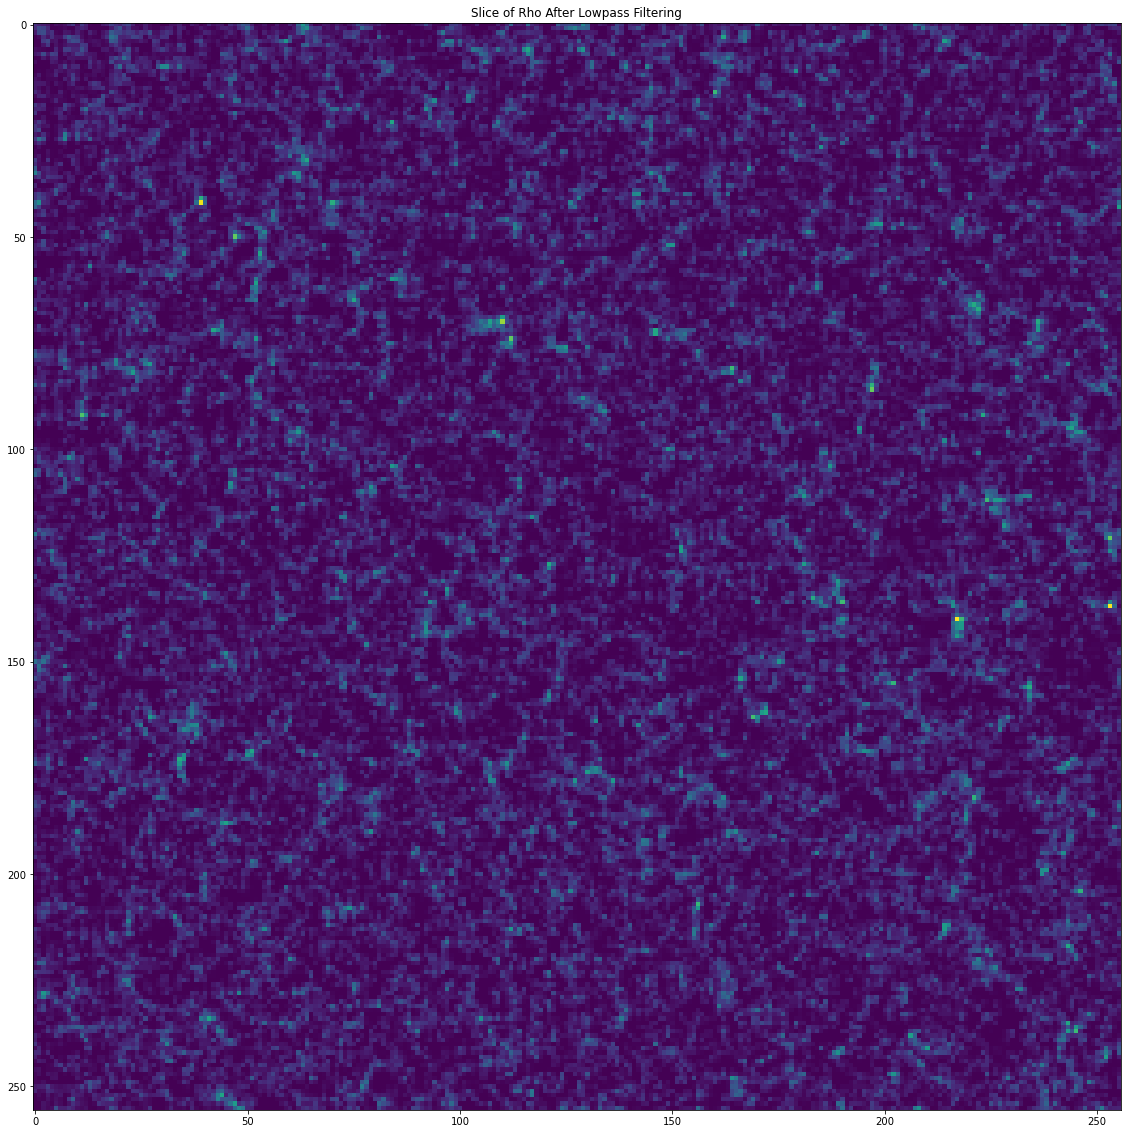

In [4]:
plt.figure(figsize = (20,20))
plt.imshow(tidal_results[3][0,:,:])
plt.title("Slice of Rho After Lowpass Filtering")

<h2> Select top 10% of values in density field, and get their positions </h2>

In [5]:
vals = tidal_results[1]
vects = tidal_results[2]
rho = tidal_results[3]

<h2> Do same as above, but for a different bias and nbar </h2>

Density painted
Rho computed


Text(0.5, 1.0, 'Slice of Rho After Lowpass Filtering')

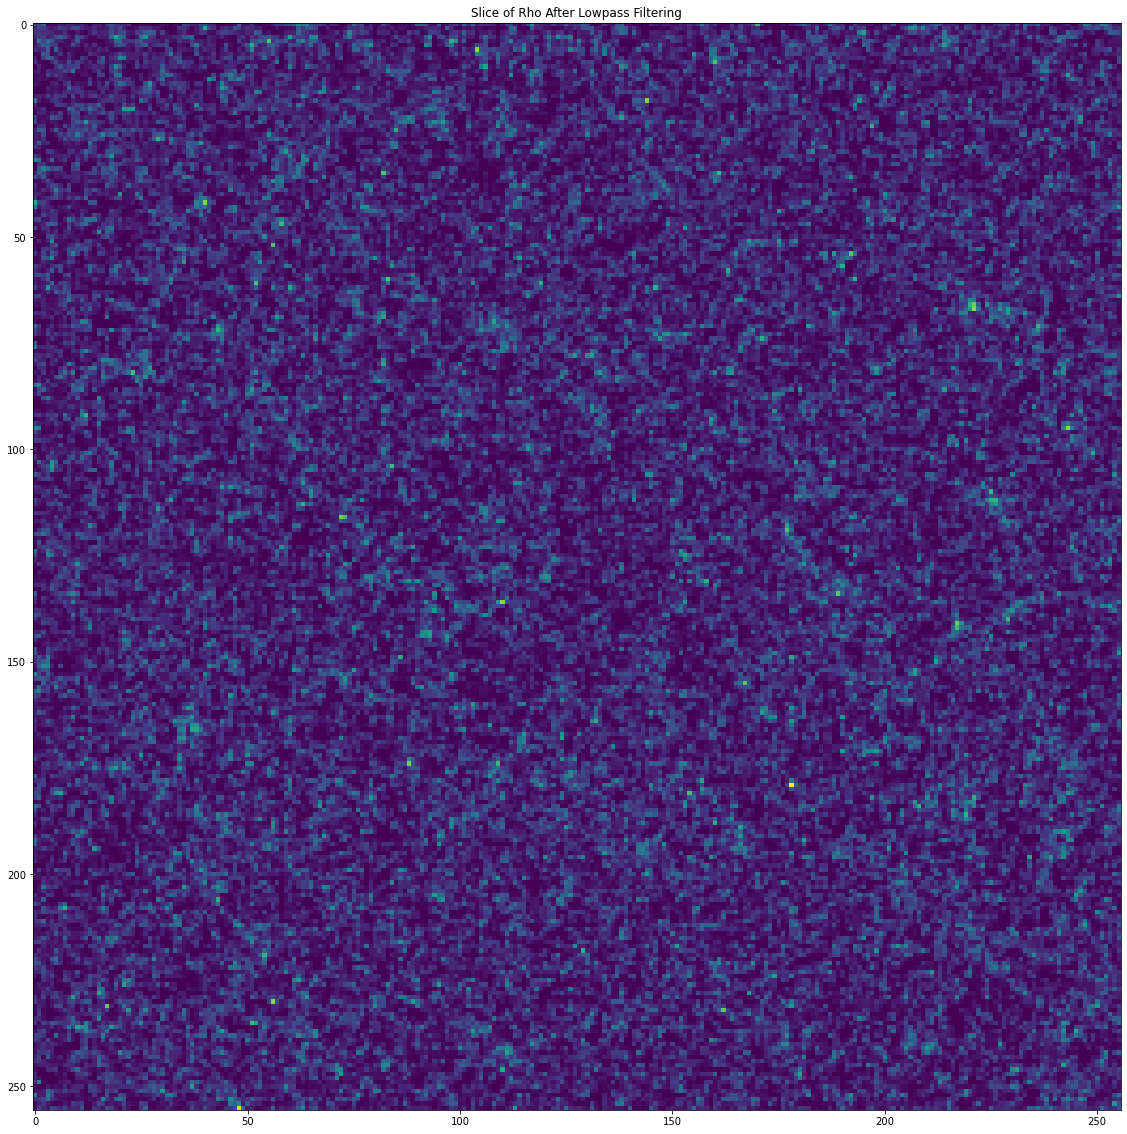

In [9]:
#Will want to vary the bias and nbar
bias = 0.5
cat = LogNormalCatalog(Plin=Plin, nbar=3e-3, BoxSize=BoxSize, Nmesh=nmesh, bias=bias, seed=42)

#extract particle positions from catalogue
b_mesh = cat.to_mesh(resampler='tsc')

b_tidal_results = calculate_tidal_vecs(b_mesh)

plt.figure(figsize = (20,20))
plt.imshow(b_tidal_results[3][0,:,:])
plt.title("Slice of Rho After Lowpass Filtering")

In [10]:
biases = []

<h2> For demonstration purposes, plot a density slice for each value of bias</h2>


In [11]:
for i in range(1,7):
    bias = i * 0.5
    cat = LogNormalCatalog(Plin=Plin, nbar=3e-3, BoxSize=BoxSize, Nmesh=nmesh, bias=bias, seed=42)

    #extract particle positions from catalogue
    meshes = cat.to_mesh(resampler='tsc')

    biases.append(calculate_tidal_vecs(meshes)[3])


Density painted
Rho computed
Density painted
Rho computed
Density painted
Rho computed
Density painted
Rho computed
Density painted
Rho computed
Density painted
Rho computed


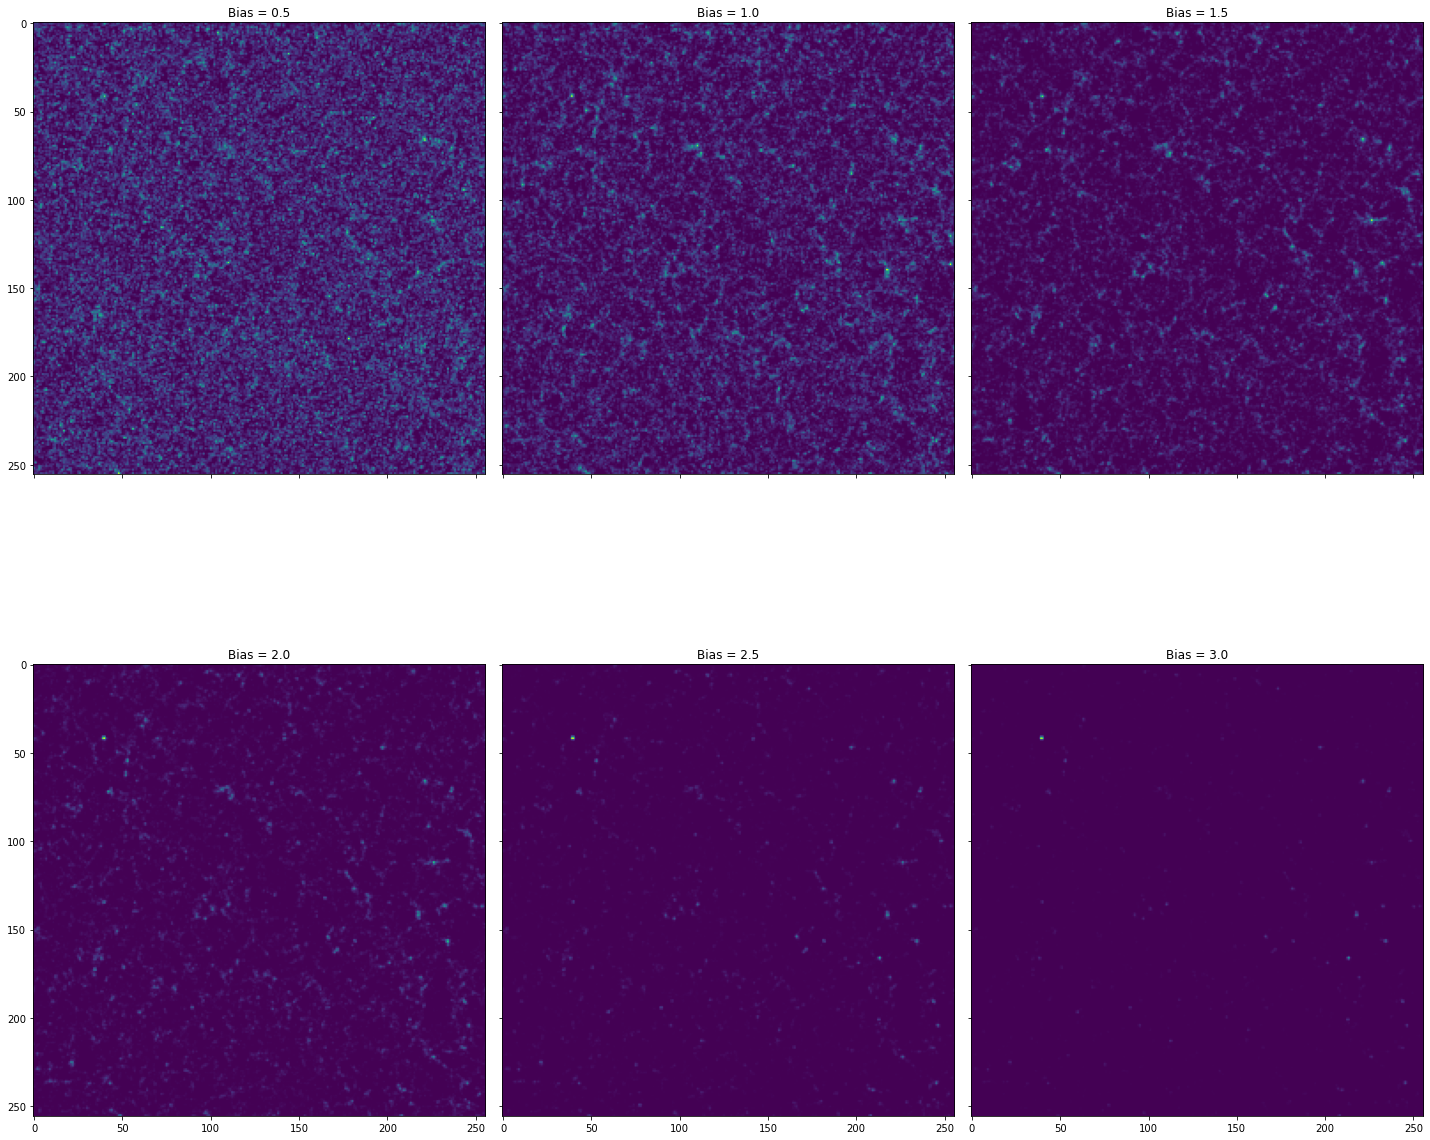

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(20,20), sharex=True, sharey=True)
axes[0,0].imshow(biases[0][0])
axes[0,0].set_title("Bias = 0.5")

axes[0,1].imshow(biases[1][0])
axes[0,1].set_title("Bias = 1.0")

axes[0,2].imshow(biases[2][0])
axes[0,2].set_title("Bias = 1.5")

axes[1,0].imshow(biases[3][0])
axes[1,0].set_title("Bias = 2.0")

axes[1,1].imshow(biases[4][0])
axes[1,1].set_title("Bias = 2.5")

axes[1,2].imshow(biases[5][0])
axes[1,2].set_title("Bias = 3.0")
fig.tight_layout()
plt.show()

<h2> A collection of cosmologies with different initial seeds </h2>

In [6]:
seeds = []
for i in range(1,5):
    seed = i * 17
    cat = LogNormalCatalog(Plin=Plin, nbar=3e-3, BoxSize=BoxSize, Nmesh=nmesh, bias=1.0, seed=seed)

    #extract particle positions from catalogue
    meshes = cat.to_mesh(resampler='tsc')

    seeds.append(calculate_tidal_vecs(meshes))


Density painted
Rho computed
Density painted
Rho computed
Density painted
Rho computed
Density painted
Rho computed


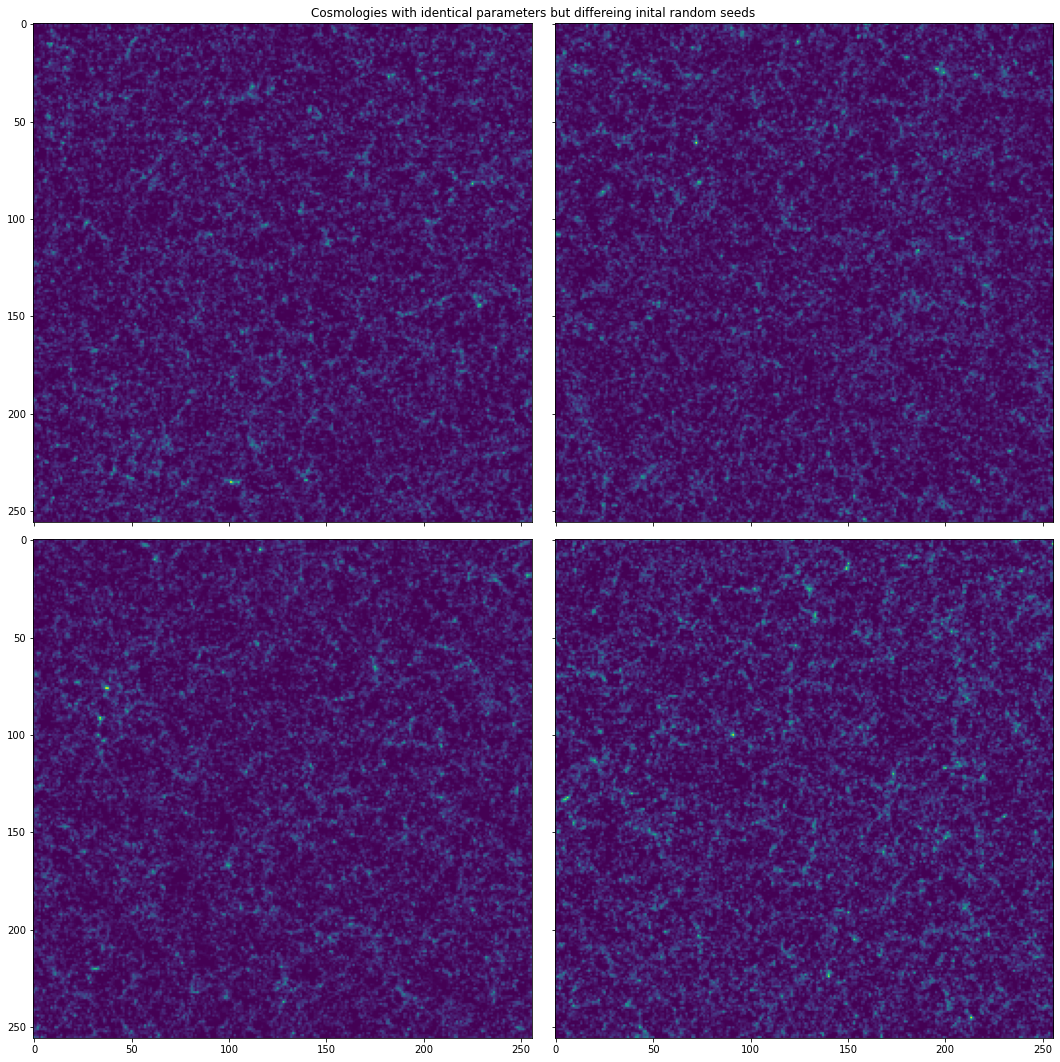

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(15,15), sharex=True, sharey=True)
axes[0,0].imshow(seeds[0][3][0])
axes[0,1].imshow(seeds[1][3][0])
axes[1,0].imshow(seeds[2][3][0])
axes[1,1].imshow(seeds[3][3][0])

fig.suptitle("Cosmologies with identical parameters but differeing inital random seeds")

fig.tight_layout()

plt.show()

In [16]:
numpyseeds = numpy.array(seeds)

/home/matt/anaconda3/envs/TIN-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [14]:
from numpy import asarray
from numpy import savez_compressed

savez_compressed('./data/nbodydata.npz', seeds)

/home/matt/anaconda3/envs/TIN-env/lib/python3.7/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


TypeError: self.ptr cannot be converted to a Python object for pickling